In [1]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
import torch
import os

from utils.data_process import data_process

In [2]:
env_list = ['ShadowHand', 'ShadowHandCatchAbreast', 'ShadowHandOver', 'ShadowHandBlockStack', 'ShadowHandCatchUnderarm',
        'ShadowHandCatchOver2Underarm', 'ShadowHandBottleCap', 'ShadowHandLiftUnderarm', 'ShadowHandTwoCatchUnderarm', 'ShadowHandDoorOpenInward',
        'ShadowHandDoorOpenOutward', 'ShadowHandDoorCloseInward', 'ShadowHandDoorCloseOutward', 'ShadowHandPushBlock', 'ShadowHandKettle',
        'ShadowHandScissors', 'ShadowHandPen', 'ShadowHandSwingCup', 'ShadowHandGraspAndPlace', 'ShadowHandSwitch']


In [21]:
frame_number = 4
obs_dim=24
act_dim=20
device='cpu'
algo='ppo'
model_idx = '20000'
seed_list = [3,4,5,6,7,8,9,10,11,12,13,14]
reward_model = torch.jit.load(f'./reward_model/model_{frame_number}_gpu.pt', map_location=device)
traj_path = 'data/videos'
scores = {env: {} for env in env_list}


In [22]:
for env_name in env_list:
    for seed in seed_list:
        path = os.path.join(traj_path, f'seed{seed}')
        scores[env_name][seed] = {'scores': [],
                                    'mean': 0,
                                    'std': 0
        }
        file__cnt = 0
        file_path = os.path.join(path, env_name)
        try:
            files = os.listdir(file_path)
        except:
            print('No such file or directory: ', file_path)
            continue
        for file in files:
            # if file.endswith('.pkl'):
            if file.endswith('.pkl') and file.split('_')[4]==model_idx:  # name: ShadowHandBlockStack_ppo_4_20221211002936_20000_traj-episode-0.pkl
                # print(file)
                file__cnt += 1 
                with open(os.path.join(path, env_name, file), 'rb') as f:
                    traj = pickle.load(f)
                    obs, action = data_process(traj, env_name)
                    # print(obs.shape, action.shape)
                    if obs.shape[1] ==  2*obs_dim and action.shape[1] == 2*act_dim:
                        obs = obs.reshape(-1, 2, obs_dim)
                        action = action.reshape(-1, 2, act_dim)
                        # print(obs.shape, action.shape)
                        oa = np.concatenate((obs, action), axis=-1).swapaxes(0,1) # (2, traj_length, obs_dim+act_dim)
                        # print(oa.shape)
                        slice_oa = np.array([[np.concatenate(s[i:i+frame_number]) for i in range(s.shape[0]-frame_number+1)] for s in oa]) # (2, batch, frame_number*(obs_dim+act_dim) )
                        # print(slice_oa.shape)
                    else:
                        oa = np.concatenate((obs, action), axis=-1)
                        slice_oa = np.array([np.concatenate(oa[i:i+frame_number]) for i in range(oa.shape[0]-frame_number+1)])  # (batch, frame_number*(obs_dim+act_dim) )
                        # print(slice_oa.shape)
                    score = reward_model(torch.tensor(slice_oa)) 
                    # print(score.shape)
                    mean_score = torch.mean(score).detach().numpy()
                    # print(mean_score)
                    scores[env_name][seed]['scores'].append(mean_score)
        # get avg score for seed over trajs
        scores[env_name][seed]['mean'] = np.mean(scores[env_name][seed]['scores'])  
        scores[env_name][seed]['std'] = np.std(scores[env_name][seed]['scores'])                   
    
        if file__cnt == 0:
            print(f'Env {env_name} seed {seed} model index {model_idx} not found.')
        else:
            print(f'Env {env_name} seed {seed} model index {model_idx} found {file__cnt} trajs.')

    # break

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Env ShadowHand seed 3 model index 20000 not found.
Env ShadowHand seed 4 model index 20000 not found.
Env ShadowHand seed 5 model index 20000 found 5 trajs.
Env ShadowHand seed 6 model index 20000 found 5 trajs.
Env ShadowHand seed 7 model index 20000 found 5 trajs.
Env ShadowHand seed 8 model index 20000 found 5 trajs.
Env ShadowHand seed 9 model index 20000 found 5 trajs.
Env ShadowHand seed 10 model index 20000 found 10 trajs.
Env ShadowHand seed 11 model index 20000 found 5 trajs.
Env ShadowHand seed 12 model index 20000 found 5 trajs.
Env ShadowHand seed 13 model index 20000 found 5 trajs.
Env ShadowHand seed 14 model index 20000 found 5 trajs.
Env ShadowHandCatchAbreast seed 3 model index 20000 found 5 trajs.
Env ShadowHandCatchAbreast seed 4 model index 20000 found 5 trajs.
Env ShadowHandCatchAbreast seed 5 model index 20000 found 5 trajs.
Env ShadowHandCatchAbreast seed 6 model index 20000 found 5 trajs.
Env ShadowHandCatchAbreast seed 7 model index 20000 found 5 trajs.
Env Sha

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


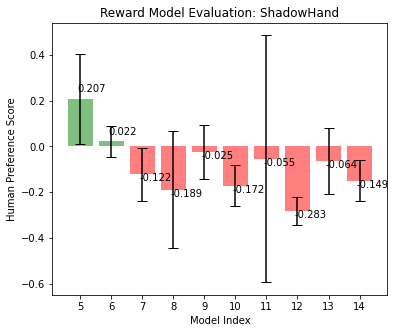

<Figure size 432x288 with 0 Axes>

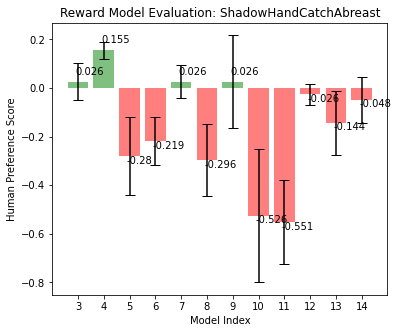

<Figure size 432x288 with 0 Axes>

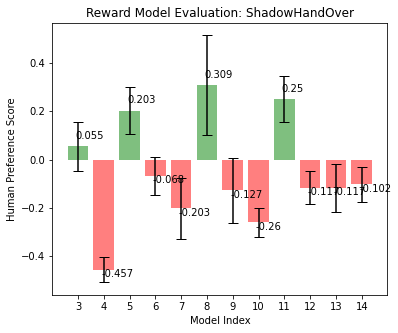

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


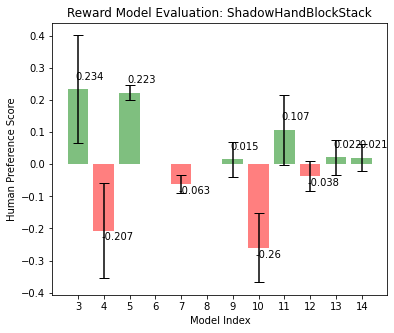

<Figure size 432x288 with 0 Axes>

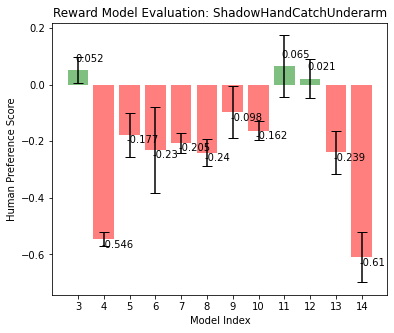

<Figure size 432x288 with 0 Axes>

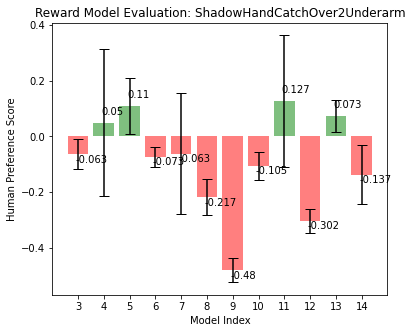

posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


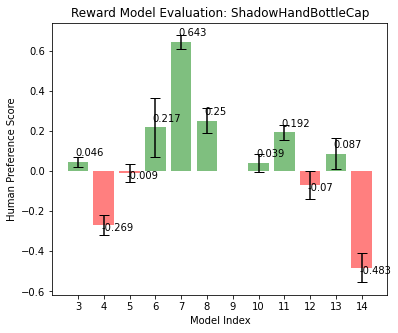

posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


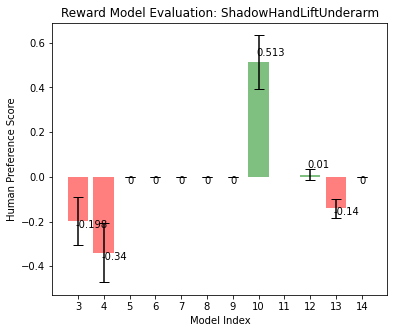

<Figure size 432x288 with 0 Axes>

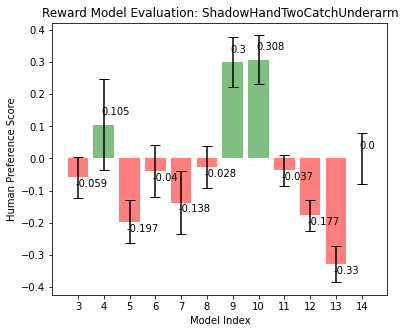

<Figure size 432x288 with 0 Axes>

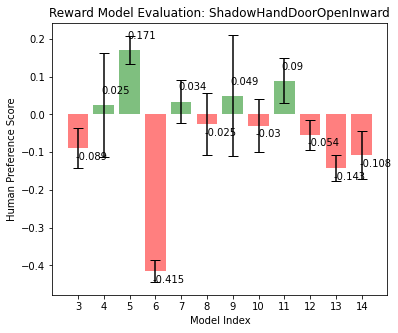

<Figure size 432x288 with 0 Axes>

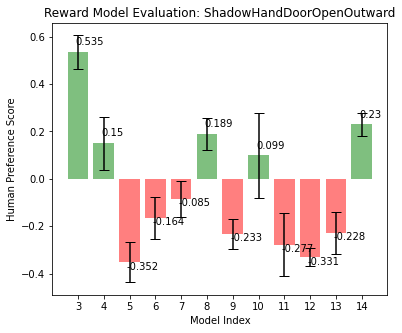

<Figure size 432x288 with 0 Axes>

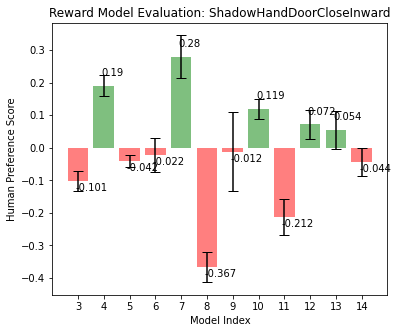

<Figure size 432x288 with 0 Axes>

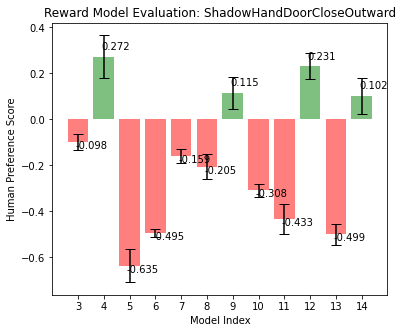

<Figure size 432x288 with 0 Axes>

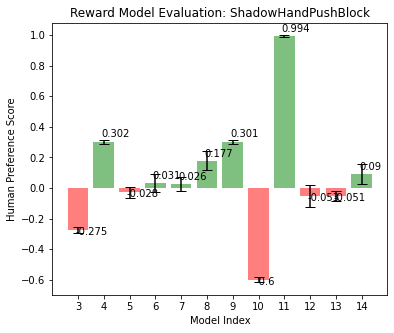

<Figure size 432x288 with 0 Axes>

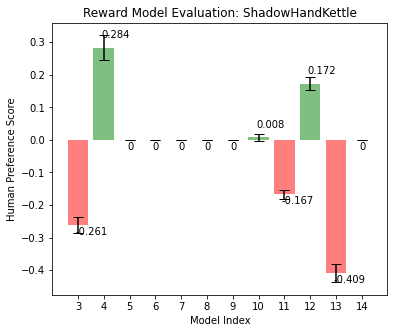

<Figure size 432x288 with 0 Axes>

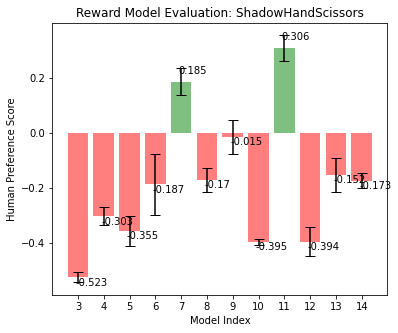

posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


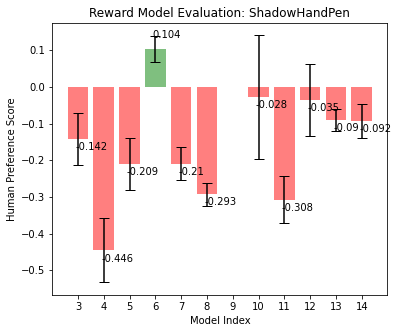

<Figure size 432x288 with 0 Axes>

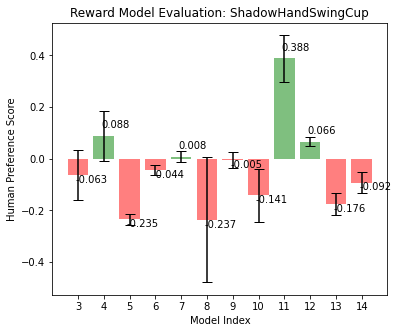

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


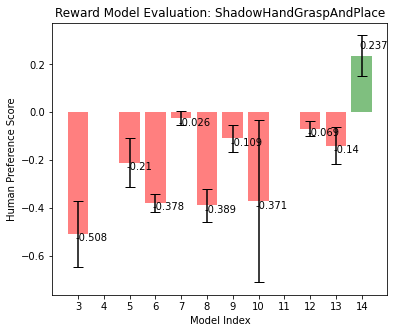

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


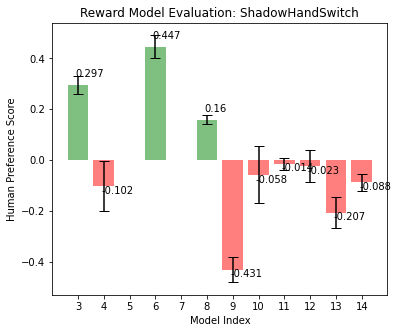

<Figure size 432x288 with 0 Axes>

In [23]:
# plot
os.makedirs(f'./data/figs/model_{frame_number}/', exist_ok=True)
env = env_list[0]
for env in env_list:
    plt.figure(figsize=(6, 5))
    x=list(scores[env].keys())
    x=[str(seed) for seed in x]
    y=[scores[env][seed]['mean'] for seed in scores[env].keys()]
    # create bar plot
    for i, v in enumerate(y):
        if v < 0:
            color = 'r'
        else:
            color = 'g'
        plt.bar(x[i], v, yerr=[scores[env][seed]['std'] for seed in scores[env].keys()][i], color=color, align='center',capsize=5, linewidth=2, alpha=0.5, ecolor='black')
    # add value labels on top of bars
    for i, v in enumerate(y):
        if v > 0:
            plt.text(i-0.1, v+0.03, str(round(v, 3)), fontsize=10)
        else:
            plt.text(i-0.1, v-0.03, str(round(v, 3)), fontsize=10)

    plt.xlabel('Model Index')
    plt.ylabel('Human Preference Score')
    plt.title(f'Reward Model Evaluation: {env}')
    # autoscale the plot to include all bars and labels
    plt.autoscale(tight=False)
    # plt.tight_layout()
    plt.savefig(f'./data/figs/model_{frame_number}/{env}_reward_model_eval.png', dpi=300)
    plt.show()
    plt.clf()